In [1]:
pip install yfinance pandas matplotlib beautifulsoup4 lxml


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 60.2 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 195.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 165.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 173.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 116.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 97.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 75.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 171.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 169.4 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15605 sha256=8200d9d9c04a2b5b05ff

In [2]:
import yfinance as yf
import pandas as pd

# Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO

# Add headers to mimic a browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

url_tesla = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
response = requests.get(url_tesla, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Find all tables
tables = soup.find_all("table")

# Use StringIO to wrap HTML before passing to read_html()
tesla_revenue = pd.DataFrame()
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        html_table = str(table)
        tesla_revenue = pd.read_html(StringIO(html_table))[0]
        break

# Clean and display result
if tesla_revenue.empty:
    print("❌ Tesla revenue table not found.")
else:
    tesla_revenue.columns = ["Date", "Revenue"]
    tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
    tesla_revenue.dropna(inplace=True)
    print(tesla_revenue.tail())


          Date Revenue
59  2010-09-30     $31
60  2010-06-30     $28
61  2010-03-31     $21
63  2009-09-30     $46
64  2009-06-30     $27


In [7]:
# GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO

# Header to mimic a browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

# GameStop revenue scraping
url_gme = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
response = requests.get(url_gme, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

tables = soup.find_all("table")

gme_revenue = pd.DataFrame()
for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        html_table = str(table)
        gme_revenue = pd.read_html(StringIO(html_table))[0]
        break

# Clean and display result
if gme_revenue.empty:
    print("❌ GameStop revenue table not found.")
else:
    gme_revenue.columns = ["Date", "Revenue"]
    gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
    gme_revenue.dropna(inplace=True)
    print(gme_revenue.tail())


          Date Revenue
61  2010-01-31  $3,524
62  2009-10-31  $1,835
63  2009-07-31  $1,739
64  2009-04-30  $1,981
65  2009-01-31  $3,492


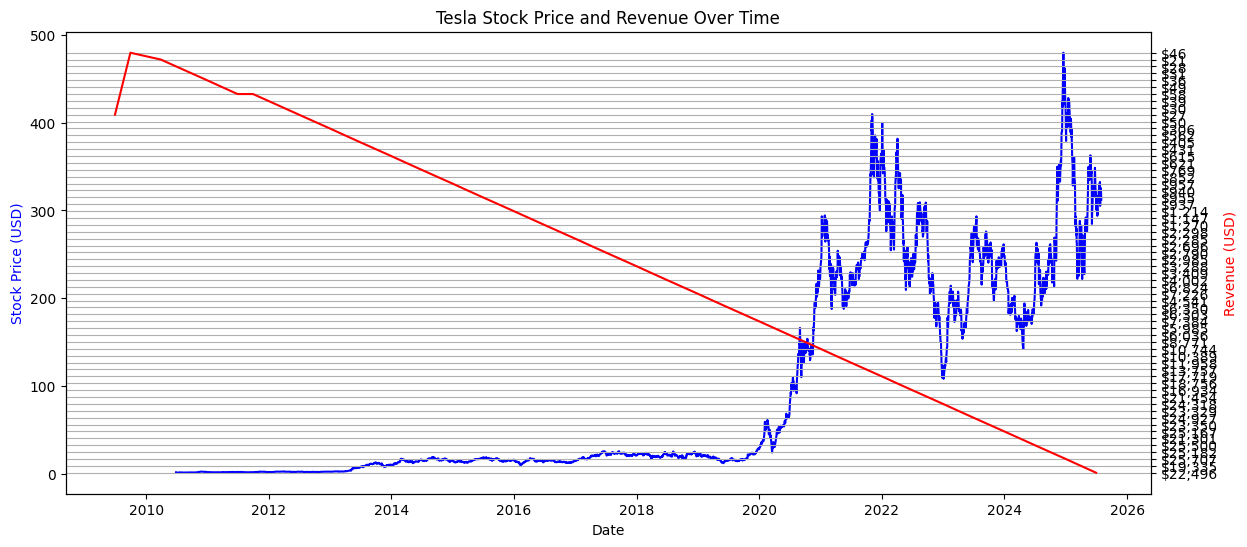

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'Date' columns are in datetime format
tesla_data["Date"] = pd.to_datetime(tesla_data["Date"])
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])

# Define the graph function
def make_graph(stock_data, revenue_data, stock):
    fig, ax1 = plt.subplots(figsize=(14, 6))

    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue', label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price (USD)', color='blue')

    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='red', label='Revenue')
    ax2.set_ylabel('Revenue (USD)', color='red')

    plt.title(f"{stock} Stock Price and Revenue Over Time")
    plt.grid()
    plt.show()

# Call the function with Tesla data
make_graph(tesla_data, tesla_revenue, "Tesla")


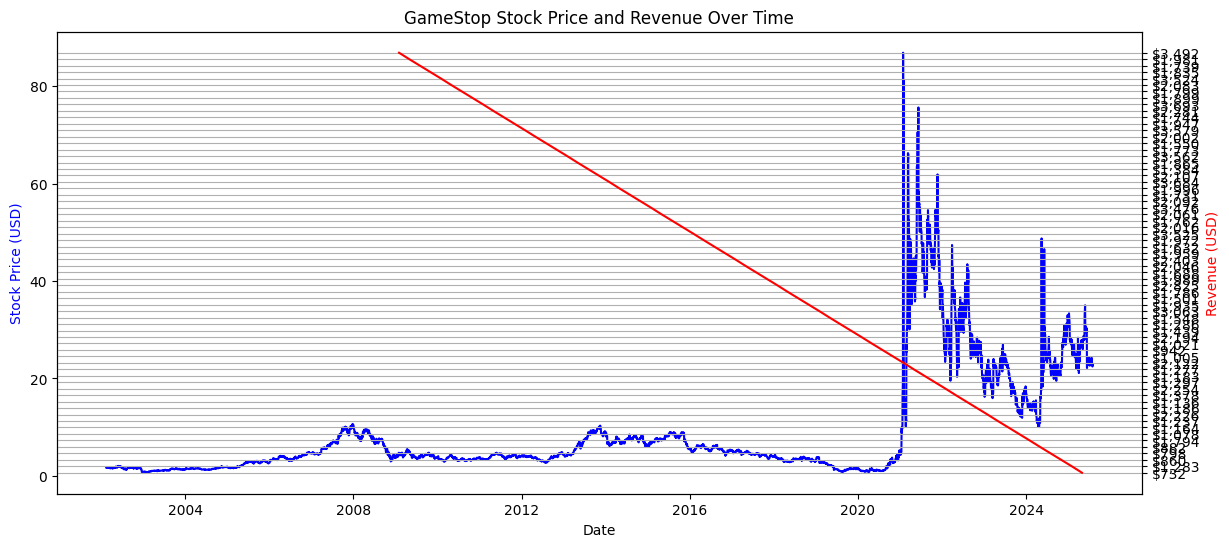

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'Date' columns are in datetime format
gme_data["Date"] = pd.to_datetime(gme_data["Date"])
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])

# Define the graph function
def make_graph(stock_data, revenue_data, stock):
    fig, ax1 = plt.subplots(figsize=(14, 6))

    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue', label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price (USD)', color='blue')

    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='red', label='Revenue')
    ax2.set_ylabel('Revenue (USD)', color='red')

    plt.title(f"{stock} Stock Price and Revenue Over Time")
    plt.grid()
    plt.show()

# Call the function with GameStop data
make_graph(gme_data, gme_revenue, "GameStop")
